In [ ]:
from pathlib import Path

import matplotlib.pyplot as plt
import numpy as np
from numpy.random import default_rng

from simulator.objects.market import Market
from simulator.objects.policies.ml_policy import MLPolicy, PassiveAggressivePolicy
from simulator.objects.policies.nn_policy import NNPolicy, PriceNaiveNNPolicy
from simulator.utils.utils import (
    generate_participants,
    generate_stocks,
)

rng = default_rng()

In [11]:
N_STOCKS = 100

market = Market(stocks=generate_stocks(N_STOCKS), interest_rate_apy=0.02)

In [ ]:
market.add_participants(
    generate_participants(
        20,
        market.stocks,
        PriceNaiveNNPolicy,
        [market, 30, 10, Path("model_naive_price.pt"), 0.05],
    )
)

# market.add_participants(
#     generate_participants(
#         20, market.stocks, NNPolicy, [market, 30, 10, Path("model2.pt"), 0.05]
#     )
# )

market.add_participants(
    generate_participants(
        20,
        market.stocks,
        NNPolicy,
        [market, 30, 10, Path("model_high_prices.pt"), 0.05],
    )
)

market.add_participants(
    generate_participants(
        20,
        market.stocks,
        MLPolicy,
        [
            market,
            50,
            10,
            Path("random_forest_regressor.pkl"),
        ],
    )
)

market.add_participants(
    generate_participants(
        20,
        market.stocks,
        PassiveAggressivePolicy,
        [market, 50, 10, Path("passive_aggressive.pkl")],
    )
)

In [13]:
N_TIMESTEPS = 365

for i in range(N_TIMESTEPS):
    print(i)
    market.step_market()

0
Number of buy order stocks: 45
Number of sell order stocks: 62
Market total value: 11903.12959957136
1
Number of buy order stocks: 47
Number of sell order stocks: 66
Market total value: 13322.242991606197
2
Number of buy order stocks: 49
Number of sell order stocks: 68
Market total value: 14829.0932576218
3
Number of buy order stocks: 42
Number of sell order stocks: 75
Market total value: 17533.573743004436
4
Number of buy order stocks: 50
Number of sell order stocks: 69
Market total value: 18481.442670659926
5
Number of buy order stocks: 41
Number of sell order stocks: 80
Market total value: 19624.165886471594
6
Number of buy order stocks: 43
Number of sell order stocks: 76
Market total value: 19991.96743529228
7
Number of buy order stocks: 47
Number of sell order stocks: 82
Market total value: 21252.671404969522
8
Number of buy order stocks: 46
Number of sell order stocks: 80
Market total value: 21798.96719350712
9
Number of buy order stocks: 43
Number of sell order stocks: 78
Mark

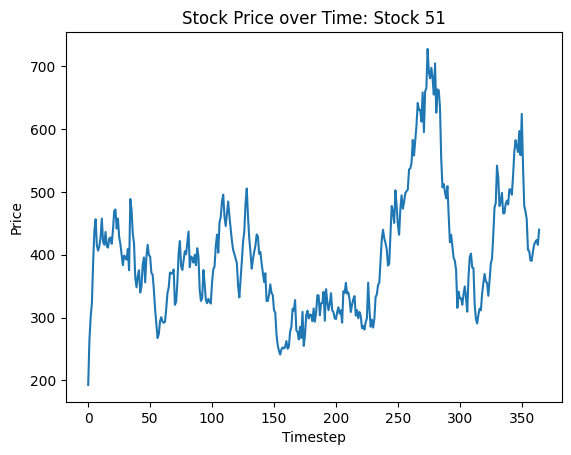

In [22]:
i = 51

plt.figure()
plt.plot(market.stocks[i].price_history[-N_TIMESTEPS:])
plt.title(f"Stock Price over Time: Stock {i}")
plt.xlabel("Timestep")
plt.ylabel("Price")
_ = plt.show()

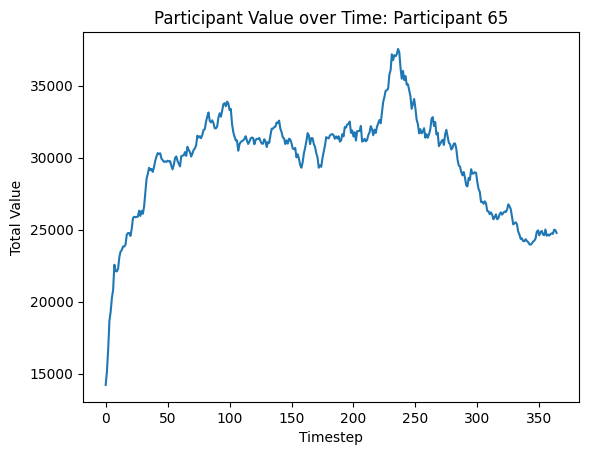

In [15]:
i = 65

plt.figure()
plt.plot(market.participants[i].total_value[-N_TIMESTEPS:])
plt.title(f"Participant Value over Time: Participant {i}")
plt.xlabel("Timestep")
plt.ylabel("Total Value")
_ = plt.show()

In [16]:
percent_changes = []
for i in range(len(market.participants)):
    percent_changes.append(
        (
            market.participants[i].total_value[-1]
            - market.participants[i].total_value[-N_TIMESTEPS]
        )
        / market.participants[i].total_value[-N_TIMESTEPS]
    )

percent_changes_array = np.array(percent_changes)
relative_performance = percent_changes_array - np.mean(percent_changes_array)

nn_1_score = np.mean(relative_performance[:20])
nn_2_score = np.mean(relative_performance[20:40])
random_forest_score = np.mean(relative_performance[40:60])
passive_aggressive_score = np.mean(relative_performance[60:])

print(f"NN1: {nn_1_score}")
print(f"NN2: {nn_2_score}")
print(f"random forest: {random_forest_score}")
print(f"passive aggressive: {passive_aggressive_score}")

NN1: 0.046206024061498575
NN2: -0.06426799360744231
random forest: 0.054503145024540275
passive aggressive: -0.036441175478596446


In [ ]:
all_feature_importances = np.zeros_like(
    market.participants[40].policy.valuation_model.feature_importances_
)
for i in range(40, 60):
    all_feature_importances += market.participants[
        i
    ].policy.valuation_model.feature_importances_
avg_feature_importances = all_feature_importances / 20
FEATURES = [
    "price",
    "cash",
    "earning value of assets",
    "latest quarterly earnings",
    "1-day percent change",
    "5-day percent change",
    "10-day percent change",
    "1-month percent change",
    "3-month percent change",
    "6-month percent change",
    "1-year percent change",
    "3-year percent change",
    "5-year percent change",
]

feature_importance_map = {
    FEATURES[i]: float(avg_feature_importances[i]) for i in range(len(FEATURES))
}

print(feature_importance_map)

{'price': 0.5430633568889867, 'cash': 0.2270710652779359, 'earning value of assets': 0.06679220165764214, 'latest quarterly earnings': 0.015892955852127744, '1-day percent change': 0.02145796628551209, '5-day percent change': 0.016175946079780706, '10-day percent change': 0.011150428055078704, '1-month percent change': 0.011125775703098442, '3-month percent change': 0.020490774344954044, '6-month percent change': 0.01405571591722087, '1-year percent change': 0.015593176701241926, '3-year percent change': 0.01860267854570418, '5-year percent change': 0.012598105498665671}
